FINAL

In [ ]:
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>
It’s pretty straightforward to remove the extra elements like the header, footer, and prompt numbers. That being said, you may want to still include some attribution to the Jupyter project and to your free hosting service. To do all of this, just include a raw cell at the end of your notebook with some more JavaScript.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#999; background:#fff;">
Created with Jupyter, delivered by Fastly, rendered by Rackspace.
</footer>

In [ ]:
import graphviz
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_graphviz
from IPython.display import Image
from IPython.display import display
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn import discriminant_analysis
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn import linear_model, datasets
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
import seaborn.apionly as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression

In [2]:
import pandas as pd
df = pd.read_csv('ADNIMERGE_full.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)  
df.head()

RID        PTID VISCODE  SITE COLPROT ORIGPROT   EXAMDATE DX_bl   AGE  \
0    2  011_S_0002      bl    11   ADNI1    ADNI1   9/8/2005    CN  74.3   
1    3  011_S_0003      bl    11   ADNI1    ADNI1  9/12/2005    AD  81.3   
2    3  011_S_0003     m06    11   ADNI1    ADNI1  3/13/2006    AD  81.3   
3    3  011_S_0003     m12    11   ADNI1    ADNI1  9/12/2006    AD  81.3   
4    3  011_S_0003     m24    11   ADNI1    ADNI1  9/12/2007    AD  81.3   

  PTGENDER  PTEDUCAT         PTETHCAT PTRACCAT  PTMARRY  APOE4      FDG  PIB  \
0     Male        16  Not Hisp/Latino    White  Married    0.0  1.36926  NaN   
1     Male        18  Not Hisp/Latino    White  Married    1.0  1.09079  NaN   
2     Male        18  Not Hisp/Latino    White  Married    1.0  1.06360  NaN   
3     Male        18  Not Hisp/Latino    White  Married    1.0  1.10384  NaN   
4     Male        18  Not Hisp/Latino    White  Married    1.0  1.03871  NaN   

   AV45  CDRSB  ADAS11  ADAS13  MMSE  RAVLT_immediate  RAVLT_learning  \
0   NaN    0.0   10.67   18.67  28.0             44.0             4.0   
1   NaN    4.5   22.00   31.00  20.0             22.0             1.0   
2   NaN    6.0   19.00   30.00  24.0             19.0             2.0   
3   NaN    3.5   24.00   35.00  17.0             31.0             2.0   
4   NaN    8.0   25.67   37.67  19.0             23.0             1.0   

   RAVLT_forgetting  RAVLT_perc_forgetting   FAQ  MOCA  EcogPtMem  EcogPtLang  \
0               6.0                54.5455   0.0   NaN        NaN         NaN   
1               4.0               100.0000  10.0   NaN        NaN         NaN   
2               6.0               100.0000  12.0   NaN        NaN         NaN   
3               7.0               100.0000  17.0   NaN        NaN         NaN   
4               5.0               100.0000  14.0   NaN        NaN         NaN   

   EcogPtVisspat  EcogPtPlan  EcogPtOrgan  EcogPtDivatt  EcogPtTotal  \
0            NaN         NaN          NaN           NaN          NaN   
1            NaN         NaN          NaN           NaN          NaN   
2            NaN         NaN          NaN           NaN          NaN   
3            NaN         NaN          NaN           NaN          NaN   
4            NaN         NaN          NaN           NaN          NaN   

   EcogSPMem  EcogSPLang  EcogSPVisspat  EcogSPPlan  EcogSPOrgan  \
0        NaN         NaN            NaN         NaN          NaN   
1        NaN         NaN            NaN         NaN          NaN   
2        NaN         NaN            NaN         NaN          NaN   
3        NaN         NaN            NaN         NaN          NaN   
4        NaN         NaN            NaN         NaN          NaN   

   EcogSPDivatt  EcogSPTotal      FLDSTRENG  \
0           NaN          NaN  1.5 Tesla MRI   
1           NaN          NaN  1.5 Tesla MRI   
2           NaN          NaN  1.5 Tesla MRI   
3           NaN          NaN  1.5 Tesla MRI   
4           NaN          NaN  1.5 Tesla MRI   

                                           FSVERSION  Ventricles  Hippocampus  \
0  Cross-Sectional FreeSurfer (FreeSurfer Version...    118233.0       8336.0   
1  Cross-Sectional FreeSurfer (FreeSurfer Version...     84599.0       5319.0   
2  Cross-Sectional FreeSurfer (FreeSurfer Version...     88580.0       5446.0   
3  Cross-Sectional FreeSurfer (FreeSurfer Version...     90099.0       5157.0   
4  Cross-Sectional FreeSurfer (FreeSurfer Version...     97420.0       5139.0   

   WholeBrain  Entorhinal  Fusiform  MidTemp        ICV        DX EXAMDATE_bl  \
0   1229740.0      4177.0   16559.0  27936.0  1984660.0        CN    9/8/2005   
1   1129830.0      1791.0   15506.0  18422.0  1920690.0  Dementia   9/12/2005   
2   1100060.0      2427.0   14400.0  16972.0  1906430.0  Dementia   9/12/2005   
3   1095640.0      1596.0   14617.0  17330.0  1903820.0  Dementia   9/12/2005   
4   1088560.0      1175.0   14033.0  16398.0  1903420.0  Dementia   9/12/2005   

   CDRSB_bl  ADAS11_bl  ADAS13_bl  MMSE_

In [3]:
df.shape[0]

13017

In [355]:
df_dict = pd.read_csv('ADNIMERGE_DICT.csv')
df_dict.head()

ID  FLDNAME    TBLNAME                                CRFNAME  QUESTION  \
0  -4      RID  ADNIMERGE  Key ADNI tables merged into one table        -4   
1  -4     PTID  ADNIMERGE  Key ADNI tables merged into one table        -4   
2  -4  VISCODE  ADNIMERGE  Key ADNI tables merged into one table        -4   
3  -4     SITE  ADNIMERGE  Key ADNI tables merged into one table        -4   
4  -4  COLPROT  ADNIMERGE  Key ADNI tables merged into one table        -4   

                                      TEXT  STATUS  DEPRULE  TYPE  LENGTH  \
0                    Participant roster ID      -4       -4    -4      -4   
1                           Participant ID      -4       -4    -4      -4   
2                               Visit code      -4       -4    -4      -4   
3                                     Site      -4       -4    -4      -4   
4  Protocol under which data was collected      -4       -4    -4      -4   

   DECIML  RANGEVAL  RANGESQL  RANGEPRL  UNITS  CODE  \
0      -4        -4        -4        -4     -4    -4   
1      -4        -4        -4        -4     -4    -4   
2      -4        -4        -4        -4     -4    -4   
3      -4        -4        -4        -4     -4    -4   
4      -4        -4        -4        -4     -4    -4   

                                               NOTES  OBJID  COLID  \
0  The 4 digit roster ID (RID) should be used to ...     -4     -4   
1  3 digit site number and 4 digit roster ID (RID...     -4     -4   
2                                               -4.0     -4     -4   
3                                               -4.0     -4     -4   
4                                               -4.0     -4     -4   

   RANGEJSCPT  NAVJSCPT  FTYPE  TAB  DE  MC  VISIBLE  LOGVISIBLE  MTBLNAME  \
0          -4        -4     -4   -4  -4  -4       -4          -4        -4   
1          -4        -4     -4   -4  -4  -4       -4          -4        -4   
2          -4        -4     -4   -4  -4  -4       -4          -4        -4   
3          -4        -4     -4   -4  -4  -4       -4          -4        -4   
4          -4        -4     -4   -4  -4  -4       -4          -4        -4   

   SUBTBLNAME  POPJSCPT  GRID  DEF           update_stamp  
0          -4        -4    -4   -4  2013-01-22 14:36:06.0  
1          -4        -4    -4   -4  2013-01-22 14:36:06.0  
2          -4        -4    -4   -4  2013-01-22 14:36:06.0  
3          -4        -4    -4   -4  2013-01-22 14:36:06.0  
4          -4        -4    -4   -4  2013-01-22 14:36:06.0

# 1. Project Scope: 
We looked at the contribution of genetic factors in predicting a person's Alzheimer's status at baseline. To that end we worked with two datasets:
- ADNIMERGE_full
- ADNI_Gene_Expression_Profile
We focused on expanding the ADNIMERGE dataset and did not take into account the longitudinal aspect of the data. We chose the ADNI2 cohort because the gene expression data was collected only for ADNI2 and ADNIGO, thus ADNI1 is a no-go. Since it would be complicated to find variables common to both ADNI2 and ADNIGO, we dropped one or the either without creating any additional bias in the dataset. our final decision is to work on ADNI2 dataset specifically.

# 2. Description of the Datasets
The data encompasses the baseline cognitive statues of a subject and follows his/her progress over a period of mutliple visits. This is the dependent variable 'DX'. The data includes a broad range of predictor categories namely: they are genetic; neuropsychological, everday cognitive and functional tests, MRI to measure changes in brain volume and PET data which looks into brain glucose metabolism. ADNIMERGE_full is the composite data set that pulls on important predictors from all these categories into one snapshot. There are extensive databases of each of these different categories by the different cohorts (ADNI 1, ADNI 2 and ADNIGO) some of which are beyond the compute power our laptops (which was an important cosideration of which dataset we wanted to expand).  


# 2.1 Cleaning up the dataset (for EDA)

### ADNIMERGE_full: 
We chose only baseline visit data because:
- we need some criteria to have a unique key of each observation. Problem is a single patient (PTID) has multiple visits, so either we combine multiple data points into a longitudinal factor or keep only one visit. We chose to ignore the longitudinal aspect since we are focusing on extending the dataset.
- We want to extend the dataset based on genetic expression data, which does not have have a longitudinal aspect (since a person's genes are set at birth) hence keeping only the baseline data can be justified.

Additionally, we got rid of administrative data, endline obserations, and the predictor called 'CDR', which is one of the advanced symptoms of Alzheimer's, and is highly predictive of an 'AD' status for a subject.

### ADNI Gene Expression Profile: 
This dataset contains the gene expression profile subjects with information on Gene LocusLinks which contains the information on the gene symbols. In order to clean the data, we have taken following steps:
- Since we are working with only ADNI2, we filtered out ADNIGO observations.
- Using the probe set with suffix '-at' we narrowed down unique Locus Links and then unique Gene Symbols (details were provided in our MileStone 3 and are provided in the Appendix). This resultied in a Gene Experession profile for individual patients.

### Mering the datasets
The two datasets were merged by the unique PID resulting in **372 observations and 7455 columns.**

### Combining the dependent variable into three categories
There were five categories in the DX, but we compbined into three to improve our prediction accuracy and then converted to a numerical variable.
- CN = SMC + CN = 1
- MCI = LMCI + EMCI = 2
- AD = AD =3 

In [5]:
# Choosing on baselinein ADNIMERGE_full
df_bl = df[df["VISCODE"]=='bl']
df_bl_adni2=df_bl[df_bl["COLPROT"]=='ADNI2']
df_bl.shape, df_bl_adni2.shape

((1784, 94), (789, 94))

In [356]:
df_bl_adni2.head()

PTID DX_bl   AGE PTGENDER  PTEDUCAT         PTETHCAT PTRACCAT  \
58   082_S_5282   SMC  66.9     Male        17  Not Hisp/Latino    White   
91   100_S_5280   SMC  67.5     Male        16  Not Hisp/Latino    Black   
92   082_S_5279   SMC  68.5     Male        20  Not Hisp/Latino    White   
142  082_S_5278   SMC  80.2     Male        19  Not Hisp/Latino    White   
174  027_S_5277   SMC  71.8   Female        15  Not Hisp/Latino    White   

           PTMARRY  APOE4  ADAS11_bl  ADAS13_bl  MMSE_bl  RAVLT_immediate_bl  \
58         Married    1.0       10.0       15.0       29                42.0   
91   Never married    0.0        3.0        5.0       30                42.0   
92         Married    0.0        4.0        7.0       30                61.0   
142  Never married    1.0        3.0       10.0       29                36.0   
174        Widowed    1.0        4.0        6.0       28                44.0   

     RAVLT_learning_bl  RAVLT_forgetting_bl  RAVLT_perc_forgetting_bl  FAQ_bl  \
58                 5.0                  2.0                   20.0000     0.0   
91                 7.0                  2.0                   20.0000     0.0   
92                 6.0                  3.0                   20.0000     0.0   
142                8.0                  7.0                   63.6364     0.0   
174                8.0                  4.0                   40.0000     1.0   

     Ventricles_bl  Hippocampus_bl  WholeBrain_bl  Entorhinal_bl  Fusiform_bl  \
58             NaN          7851.0            NaN            NaN          NaN   
91         33185.0          8297.0      1165500.0         4946.0      20147.0   
92         21327.0          7654.0      1081140.0         4065.0      17964.0   
142        30975.0          7480.0      1022610.0         4313.0      19821.0   
174        25360.0          7278.0      1006710.0         4043.0      15999.0   

     MidTemp_bl     ICV_bl  MOCA_bl  EcogPtMem_bl  EcogPtLang_bl  \
58          NaN  1498720.0      NaN           NaN            NaN   
91      21194.0  1656460.0     28.0         1.875        1.00000   
92      18611.0  1508210.0     27.0         1.250        1.44444   
142     17272.0  1461910.0     28.0         1.875        1.22222   
174     17258.0  1320000.0     25.0         2.750        2.22222   

     EcogPtVisspat_bl  EcogPtPlan_bl  EcogPtOrgan_bl  EcogPtDivatt_bl  \
58                NaN            NaN             NaN              NaN   
91            1.00000            1.0         2.00000             2.00   
92            1.00000            1.0         1.16667             1.75   
142           1.14286            1.0         1.33333             1.00   
174           1.14286            1.4         1.40000             1.50   

     EcogSPTotal_bl   FDG_bl   AV45_bl  
58          1.25641  1.13549  1.326790  
91          1.25000  1.25195  0.983143  
92          1.37838  1.50629  0.985156  
142         1.05128  1.22045  1.226230  
174         1.25641  1.42276  1.734130

In [7]:
# Dropping administrative columns
df_bl_adni2=df_bl_adni2.drop('RID',1)
df_bl_adni2=df_bl_adni2.drop('SITE',1)
df_bl_adni2=df_bl_adni2.drop('ORIGPROT',1)
df_bl_adni2=df_bl_adni2.drop('EXAMDATE',1)
df_bl_adni2=df_bl_adni2.drop('PIB',1)
df_bl_adni2=df_bl_adni2.drop('EXAMDATE_bl',1)
df_bl_adni2=df_bl_adni2.drop('FLDSTRENG',1)
df_bl_adni2=df_bl_adni2.drop('FSVERSION',1)
df_bl_adni2=df_bl_adni2.drop('FLDSTRENG_bl',1)
df_bl_adni2=df_bl_adni2.drop('FSVERSION_bl',1)
df_bl_adni2=df_bl_adni2.drop('PIB_bl',1)
df_bl_adni2=df_bl_adni2.drop('Years_bl',1)
df_bl_adni2=df_bl_adni2.drop('Month_bl',1)
df_bl_adni2=df_bl_adni2.drop('Month',1)
df_bl_adni2=df_bl_adni2.drop('M',1)
df_bl_adni2=df_bl_adni2.drop('update_stamp',1)
df_bl_adni2=df_bl_adni2.drop('CDRSB_bl',1)

In [8]:
df_bl_adni2.head()

PTID VISCODE COLPROT DX_bl   AGE PTGENDER  PTEDUCAT  \
58   082_S_5282      bl   ADNI2   SMC  66.9     Male        17   
91   100_S_5280      bl   ADNI2   SMC  67.5     Male        16   
92   082_S_5279      bl   ADNI2   SMC  68.5     Male        20   
142  082_S_5278      bl   ADNI2   SMC  80.2     Male        19   
174  027_S_5277      bl   ADNI2   SMC  71.8   Female        15   

            PTETHCAT PTRACCAT        PTMARRY  APOE4      FDG      AV45  CDRSB  \
58   Not Hisp/Latino    White        Married    1.0  1.13549  1.326790    0.0   
91   Not Hisp/Latino    Black  Never married    0.0  1.25195  0.983143    0.0   
92   Not Hisp/Latino    White        Married    0.0  1.50629  0.985156    0.0   
142  Not Hisp/Latino    White  Never married    1.0  1.22045  1.226230    0.0   
174  Not Hisp/Latino    White        Widowed    1.0  1.42276  1.734130    0.5   

     ADAS11  ADAS13  MMSE  RAVLT_immediate  RAVLT_learning  RAVLT_forgetting  \
58     10.0    15.0  29.0             42.0             5.0               2.0   
91      3.0     5.0  30.0             42.0             7.0               2.0   
92      4.0     7.0  30.0             61.0             6.0               3.0   
142     3.0    10.0  29.0             36.0             8.0               7.0   
174     4.0     6.0  28.0             44.0             8.0               4.0   

     RAVLT_perc_forgetting  FAQ  MOCA  EcogPtMem  EcogPtLang  EcogPtVisspat  \
58                 20.0000  0.0   NaN        NaN         NaN            NaN   
91                 20.0000  0.0  28.0      1.875     1.00000        1.00000   
92                 20.0000  0.0  27.0      1.250     1.44444        1.00000   
142                63.6364  0.0  28.0      1.875     1.22222        1.14286   
174                40.0000  1.0  25.0      2.750     2.22222        1.14286   

     EcogPtPlan  EcogPtOrgan  EcogPtDivatt  EcogPtTotal  EcogSPMem  \
58          NaN          NaN           NaN          NaN      1.625   
91          1.0      2.00000          2.00      1.43590      1.625   
92          1.0      1.16667          1.75      1.25641      1.875   
142         1.0      1.33333          1.00      1.30769      1.250   
174         1.4      1.40000          1.50      1.84211      1.875   

     EcogSPLang  EcogSPVisspat  EcogSPPlan  EcogSPOrgan  EcogSPDivatt  \
58      1.33333        1.14286         1.2      1.00000       1.00000   
91      1.11111        1.28571         1.0      1.25000       1.00000   
92      1.22222        1.28571         1.0      1.33333       1.33333   
142     1.00000        1.00000         1.0      1.00000       1.00000   
174     1.00000        1.00000         1.0      1.00000       1.75000   

     EcogSPTotal  Ventricles  Hippocampus  WholeBrain  Entorhinal  Fusiform  \
58       1.25641         NaN       7851.0         NaN         NaN       NaN   
91       1.25000     33185.0       8297.0   1165500.0      4946.0   20147.0   
92       1.37838     21327.0       7654.0   1081140.0      4065.0   17964.0   
142      1.05128     30975.0       7480.0   1022610.0      4313.0   19821.0   
174      1.25641     25360.0       7278.0   1006710.0      4043.0   15999.0   

     MidTemp        ICV  DX  ADAS11_bl  ADAS13_bl  MMSE_bl  \
58       NaN  1498720.0  CN       10.0       15.0       29   
91   21194.0  1656460.0  CN        3.0        5.0       30   
92   18611.0  1508210.0  CN        4.0        7.0       30   
142  17272.0  1461910.0  CN        3.0       10.0       29   
174  17258.0  1320000.0  CN        4.0        6.0       28   

     RAVLT_immediate_bl  RAVLT_learning_bl  RAVLT_forgetting_bl  \
58                 42.0                5.0                  2.0   
91                 42.0                7.0                  2.0   
92                 61.0                6.0                  3.0   
142                36.0                8.0                  7.0   
174                44.0                8.0                  4.0   

     RAVLT_perc_forgetting_bl  FAQ_bl  Ventricles_bl  Hippoc

In [9]:
# Dropping endline columns
df_bl_adni2=df_bl_adni2.drop(df_bl_adni2.columns[[range(11,45)]], 1)
df_bl_adni2.head()

PTID VISCODE COLPROT DX_bl   AGE PTGENDER  PTEDUCAT  \
58   082_S_5282      bl   ADNI2   SMC  66.9     Male        17   
91   100_S_5280      bl   ADNI2   SMC  67.5     Male        16   
92   082_S_5279      bl   ADNI2   SMC  68.5     Male        20   
142  082_S_5278      bl   ADNI2   SMC  80.2     Male        19   
174  027_S_5277      bl   ADNI2   SMC  71.8   Female        15   

            PTETHCAT PTRACCAT        PTMARRY  APOE4  ADAS11_bl  ADAS13_bl  \
58   Not Hisp/Latino    White        Married    1.0       10.0       15.0   
91   Not Hisp/Latino    Black  Never married    0.0        3.0        5.0   
92   Not Hisp/Latino    White        Married    0.0        4.0        7.0   
142  Not Hisp/Latino    White  Never married    1.0        3.0       10.0   
174  Not Hisp/Latino    White        Widowed    1.0        4.0        6.0   

     MMSE_bl  RAVLT_immediate_bl  RAVLT_learning_bl  RAVLT_forgetting_bl  \
58        29                42.0                5.0                  2.0   
91        30                42.0                7.0                  2.0   
92        30                61.0                6.0                  3.0   
142       29                36.0                8.0                  7.0   
174       28                44.0                8.0                  4.0   

     RAVLT_perc_forgetting_bl  FAQ_bl  Ventricles_bl  Hippocampus_bl  \
58                    20.0000     0.0            NaN          7851.0   
91                    20.0000     0.0        33185.0          8297.0   
92                    20.0000     0.0        21327.0          7654.0   
142                   63.6364     0.0        30975.0          7480.0   
174                   40.0000     1.0        25360.0          7278.0   

     WholeBrain_bl  Entorhinal_bl  Fusiform_bl  MidTemp_bl     ICV_bl  \
58             NaN            NaN          NaN         NaN  1498720.0   
91       1165500.0         4946.0      20147.0     21194.0  1656460.0   
92       1081140.0         4065.0      17964.0     18611.0  1508210.0   
142      1022610.0         4313.0      19821.0     17272.0  1461910.0   
174      1006710.0         4043.0      15999.0     17258.0  1320000.0   

     MOCA_bl  EcogPtMem_bl  EcogPtLang_bl  EcogPtVisspat_bl  EcogPtPlan_bl  \
58       NaN           NaN            NaN               NaN            NaN   
91      28.0         1.875        1.00000           1.00000            1.0   
92      27.0         1.250        1.44444           1.00000            1.0   
142     28.0         1.875        1.22222           1.14286            1.0   
174     25.0         2.750        2.22222           1.14286            1.4   

     EcogPtOrgan_bl  EcogPtDivatt_bl  EcogPtTotal_bl  EcogSPMem_bl  \
58              NaN              NaN             NaN         1.625   
91          2.00000             2.00         1.43590         1.625   
92          1.16667             1.75         1.25641         1.875   
142         1.33333             1.00         1.30769         1.250   
174         1.40000             1.50         1.84211         1.875   

     EcogSPLang_bl  EcogSPVisspat_bl  EcogSPPlan_bl  EcogSPOrgan_bl  \
58         1.33333           1.14286            1.2         1.00000   
91         1.11111           1.28571            1.0         1.25000   
92         1.22222           1.28571            1.0         1.33333   
142        1.00000           1.00000            1.0         1.00000   
174        1.00000           1.00000            1.0         1.00000   

     EcogSPDivatt_bl  EcogSPTotal_bl   FDG_bl   AV45_bl  
58           1.00000         1.25641  1.13549  1.326790  
91           1.00000         1.25000  1.25195  0.983143  
92           1.33333         1.37838  1.50629  0.985156  
142          1.00000         1.05128  1.22045  1.226230  
174          1.75000         1.25641  1.42276  1.734130

In [10]:
#Dropping the study partner variables
df_bl_adni2=df_bl_adni2.drop(df_bl_adni2.columns[[range(33,40)]], 1)

# Dropping VISCODE and COHORT since they are also predictive
df_bl_adni2=df_bl_adni2.drop('VISCODE',1)
df_bl_adni2=df_bl_adni2.drop('COLPROT',1)

#checking new shape
df_bl_adni2.shape

(789, 34)

In [11]:
#exporting file
df_bl_adni2.to_csv('df_ADNIMERGE_clean.csv')

In [12]:
df_bl_adni2.head()

PTID DX_bl   AGE PTGENDER  PTEDUCAT         PTETHCAT PTRACCAT  \
58   082_S_5282   SMC  66.9     Male        17  Not Hisp/Latino    White   
91   100_S_5280   SMC  67.5     Male        16  Not Hisp/Latino    Black   
92   082_S_5279   SMC  68.5     Male        20  Not Hisp/Latino    White   
142  082_S_5278   SMC  80.2     Male        19  Not Hisp/Latino    White   
174  027_S_5277   SMC  71.8   Female        15  Not Hisp/Latino    White   

           PTMARRY  APOE4  ADAS11_bl  ADAS13_bl  MMSE_bl  RAVLT_immediate_bl  \
58         Married    1.0       10.0       15.0       29                42.0   
91   Never married    0.0        3.0        5.0       30                42.0   
92         Married    0.0        4.0        7.0       30                61.0   
142  Never married    1.0        3.0       10.0       29                36.0   
174        Widowed    1.0        4.0        6.0       28                44.0   

     RAVLT_learning_bl  RAVLT_forgetting_bl  RAVLT_perc_forgetting_bl  FAQ_bl  \
58                 5.0                  2.0                   20.0000     0.0   
91                 7.0                  2.0                   20.0000     0.0   
92                 6.0                  3.0                   20.0000     0.0   
142                8.0                  7.0                   63.6364     0.0   
174                8.0                  4.0                   40.0000     1.0   

     Ventricles_bl  Hippocampus_bl  WholeBrain_bl  Entorhinal_bl  Fusiform_bl  \
58             NaN          7851.0            NaN            NaN          NaN   
91         33185.0          8297.0      1165500.0         4946.0      20147.0   
92         21327.0          7654.0      1081140.0         4065.0      17964.0   
142        30975.0          7480.0      1022610.0         4313.0      19821.0   
174        25360.0          7278.0      1006710.0         4043.0      15999.0   

     MidTemp_bl     ICV_bl  MOCA_bl  EcogPtMem_bl  EcogPtLang_bl  \
58          NaN  1498720.0      NaN           NaN            NaN   
91      21194.0  1656460.0     28.0         1.875        1.00000   
92      18611.0  1508210.0     27.0         1.250        1.44444   
142     17272.0  1461910.0     28.0         1.875        1.22222   
174     17258.0  1320000.0     25.0         2.750        2.22222   

     EcogPtVisspat_bl  EcogPtPlan_bl  EcogPtOrgan_bl  EcogPtDivatt_bl  \
58                NaN            NaN             NaN              NaN   
91            1.00000            1.0         2.00000             2.00   
92            1.00000            1.0         1.16667             1.75   
142           1.14286            1.0         1.33333             1.00   
174           1.14286            1.4         1.40000             1.50   

     EcogSPTotal_bl   FDG_bl   AV45_bl  
58          1.25641  1.13549  1.326790  
91          1.25000  1.25195  0.983143  
92          1.37838  1.50629  0.985156  
142         1.05128  1.22045  1.226230  
174         1.25641  1.42276  1.734130

# 2.2 EDA:
We did EDA on the ADNIMERGE_full data set which has 32 predictors to get a sense of which variables have some correlation wiht the independpent variable. We did not do EDA with the Gene Expression Profile because there are 7421 Gene symbols and it is unlikely that any or several of them will individually important. We primarily used the seaborn library for EDA visualization.

In [13]:
import seaborn.apionly as sns
sns.set_context("notebook")

## Pairgrid betwen predictors
We were curious to see how predicitors were correlated wiht each other if at all. For example, is there a correlation between low ventricular volume with low cognitive score. We tried a pair grid with some randomly chosen variables across categories as a start. 

The only notable correlations are between ADAS11 and ventricular boundary shift integral (BSI) and FDG. Increasing ADAS score (higher score indicated greater cognitive dysfunction) is correlated with lower FDG (i.e. low glucose metabolism in the brain) and high Ventricle BSI (more volume loss). This correlation is not unexpecting. It is interesting to note that the other three cognitive tests - MMSE, RAVLT and Every day Cog Memory - don’t show any correlation with the PET or MRI variables. Of course, we didn’t do an extensive pair grid (which would result in about 900 plots) on ADNIMERGE_full, but rather an initial scoping. 

In [14]:
av_age_dx=df_bl_adni2.groupby('DX_bl').AGE.mean()
av_ADAS=df_bl_adni2.groupby('DX_bl').AGE.mean()
av_age_dx

DX_bl
AD      74.669333
CN      73.399468
EMCI    70.986740
LMCI    72.197561
SMC     72.201887
Name: AGE, dtype: float64

In [15]:
sns.set()

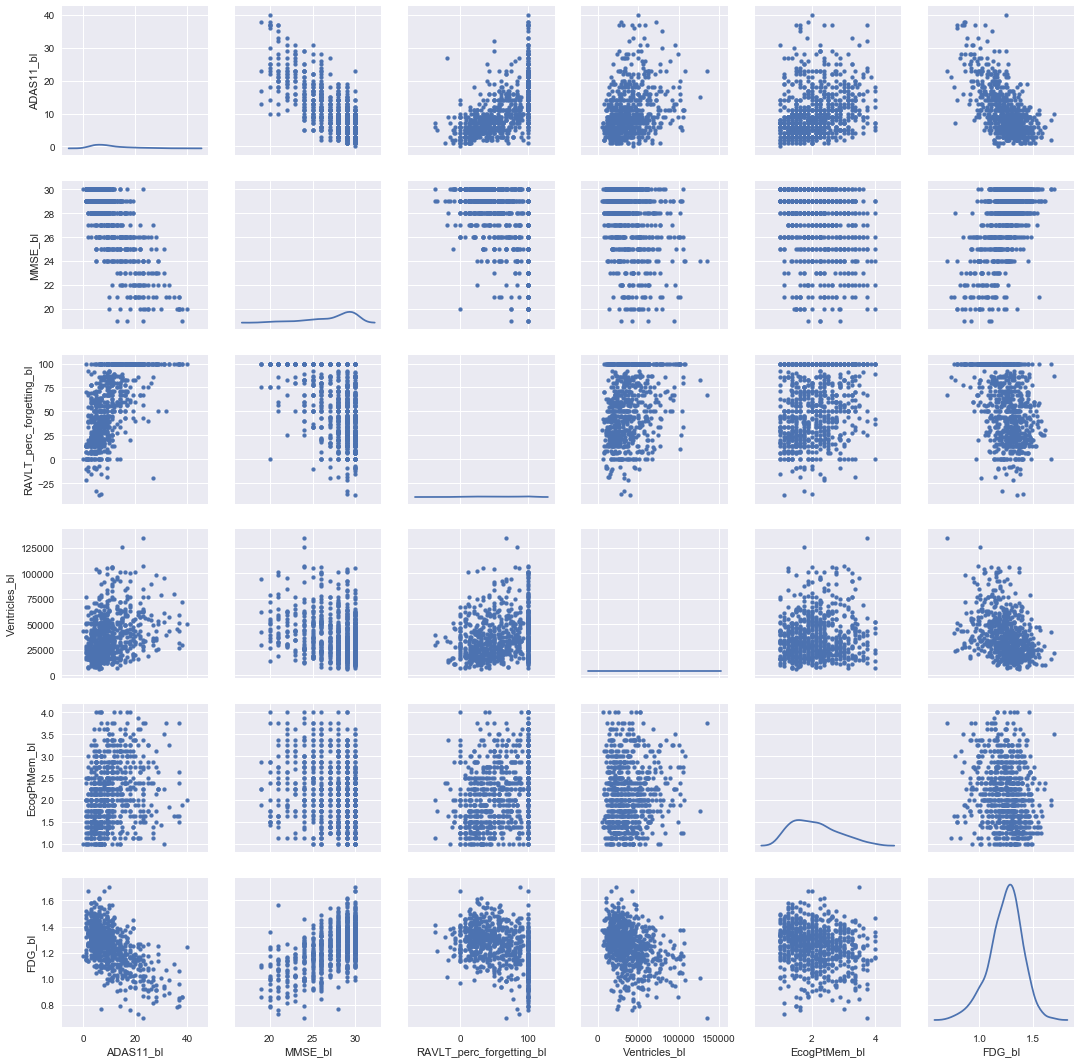

In [16]:
g = sns.PairGrid(df_bl_adni2, vars=['ADAS11_bl','MMSE_bl', 'RAVLT_perc_forgetting_bl', 'Ventricles_bl', 'EcogPtMem_bl', 'FDG_bl'])
g.map_diag(sns.kdeplot)
g.map_offdiag(plt.scatter, s=15)

### Correlation of predictors with DX

- We know that APOE4 is a strong indicator of AD, and a simple bar chart validates that.
- Next we looked at how neuropsychological assessments were correlated to DX. ADAS does very well in detecting AD, MMSE is quite poor performance while RAVLT_forgetting and RAVLT_learning also perform quite well.
- Next we looked at the two PET variables - FDG and AV45 which measure glucose metabolism. FDG shows stronger correlation with SD, AV45 no correlation with any of the DX_bl variables.

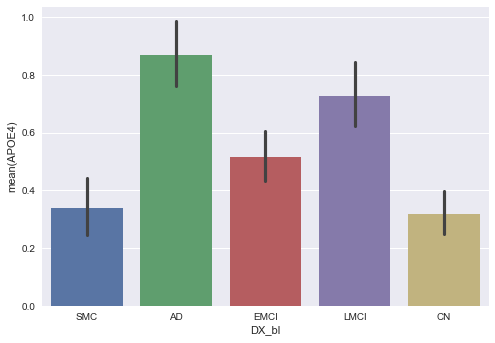

In [17]:
ax = sns.barplot(x="DX_bl", y="APOE4", data=df_bl_adni2)

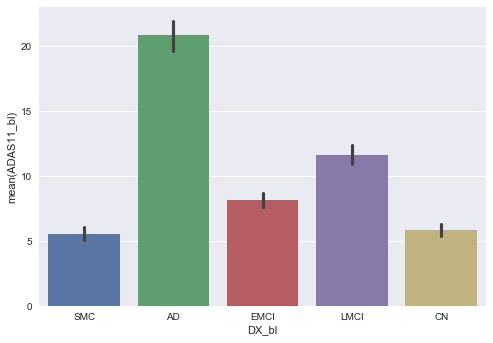

In [18]:
ax = sns.barplot(x="DX_bl", y="ADAS11_bl", data=df_bl_adni2)

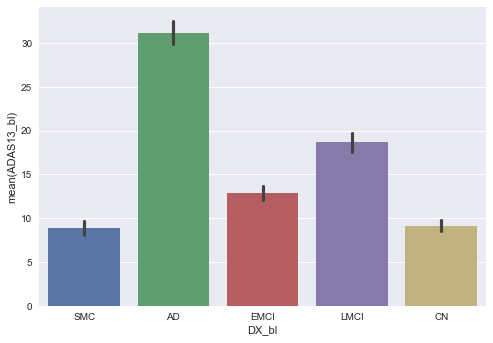

In [19]:
ax = sns.barplot(x="DX_bl", y="ADAS13_bl", data=df_bl_adni2)

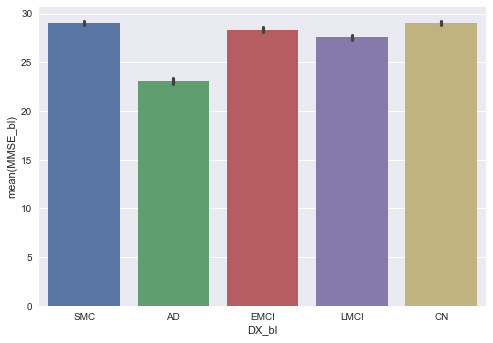

In [20]:
ax = sns.barplot(x="DX_bl", y="MMSE_bl", data=df_bl_adni2)


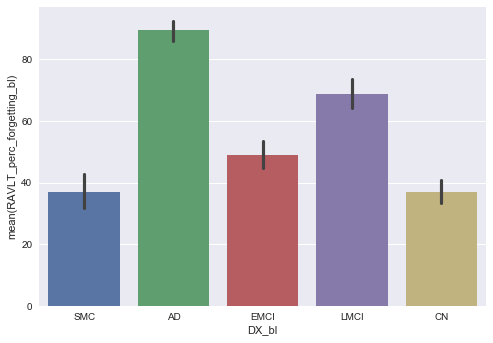

In [21]:
ax = sns.barplot(x="DX_bl", y="RAVLT_perc_forgetting_bl", data=df_bl_adni2)

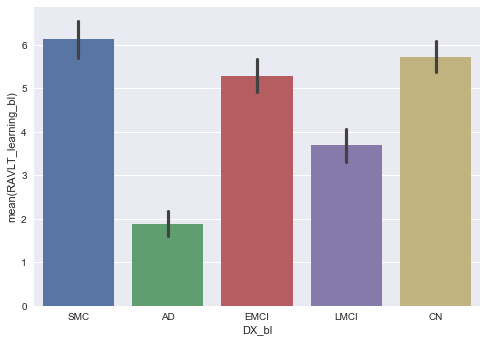

In [22]:
x = sns.barplot(x="DX_bl", y="RAVLT_learning_bl", data=df_bl_adni2)

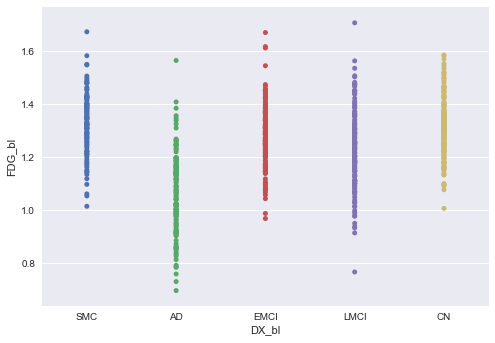

In [23]:
sns.stripplot(x="DX_bl", y="FDG_bl", data=df_bl_adni2);

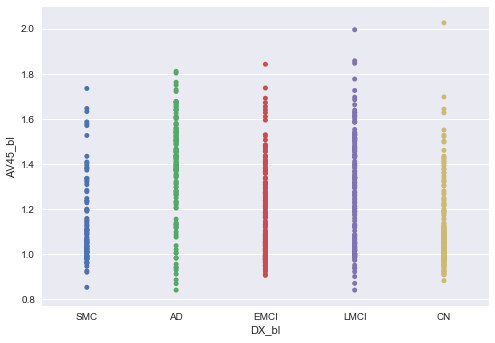

In [24]:
sns.stripplot(x="DX_bl", y="AV45_bl", data=df_bl_adni2);

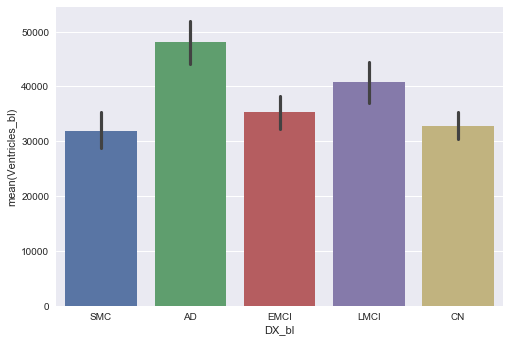

In [25]:
sns.barplot(x="DX_bl", y="Ventricles_bl", data=df_bl_adni2);

### Conclusion: 
There seems to be some correlation with the AD condition, but the other DX conditions shows very noisy correlation - which is why Alzheimer’s in its early phases it very hard to detect. **Our model would seek to make it easier to detect ealier conditions of DX. **


In [26]:
#importing the gene expression profile or merging
df_gene_exp = pd.read_csv('genes_expression_unique.csv')
df_gene_exp.head()

PTID  LOC645432  LOC127254  LOC9545  LOC22880  LOC504190  LOC89876  \
0  037_S_4410      5.031      2.698    4.356     5.313      3.091     2.720   
1  006_S_4153      5.349      2.660    5.015     5.269      3.406     2.591   
2  099_S_4205      5.111      2.404    5.000     5.556      3.116     2.771   
3  007_S_4467      5.027      2.484    4.229     5.831      3.136     2.907   
4  128_S_0205      6.195      2.293    4.444     5.824      2.781     2.630   

   LOC56104  LOC113402  LOC56521  LOC58504  LOC64857  LOC9681  LOC11022  \
0     2.361      8.513     2.653     4.450     4.416    3.176     4.535   
1     2.266      8.334     2.731     4.210     4.679    2.288     4.780   
2     2.147      8.637     2.847     4.256     4.675    2.546     4.919   
3     2.333      8.478     2.744     5.857     4.665    3.357     4.414   
4     2.521      8.209     2.373     4.302     4.662    4.153     4.926   

   LOC440093  LOC55364  LOC57705  LOC57787  LOC7738  LOC56548  LOC51319  \
0      2.408     7.234     7.773     3.140    5.558     6.646     3.534   
1      3.479     6.768     8.917     4.174    4.142     6.014     2.922   
2      2.424     7.176     8.335     3.349    4.865     7.091     2.808   
3      2.344     6.836     8.051     3.610    4.482     6.182     3.201   
4      2.094     7.024     8.238     3.163    4.228     5.626     3.260   

   LOC170626  LOC51093  LOC4543  LOC9896  LOC7169  LOC434  LOC886  LOC123207  \
0      2.129     5.027    2.556    7.776    3.277   2.438   2.307      6.940   
1      2.314     5.166    2.373    8.228    2.811   2.389   2.165      6.738   
2      2.283     5.147    2.423    7.825    2.839   2.895   2.045      7.046   
3      2.334     4.842    2.364    7.770    2.680   2.840   2.211      6.530   
4      2.007     4.578    2.509    7.729    3.105   2.320   2.076      6.919   

   LOC6489  LOC2303  LOC101930037  LOC387804  LOC389762  LOC158046  LOC128366  \
0    4.494    2.648         2.253      2.719      2.007      2.238      2.190   
1    2.853    2.644         2.276      3.021      2.056      2.635      2.492   
2    3.687    2.771         2.503      2.738      2.160      2.272      2.451   
3    4.599    2.630         2.859      3.150      1.865      2.521      2.126   
4    3.043    2.965         2.294      2.875      1.967      2.369      2.392   

   LOC7273  LOC25798  LOC94025  LOC2950  LOC10148  LOC1277  LOC1278  LOC8992  \
0    2.693     2.753     2.449   11.191     2.516    2.933    2.128   10.943   
1    3.038     2.704     2.615   11.267     2.661    3.274    2.252   11.098   
2    2.490     2.533     2.455   11.158     2.975    3.066    2.523   10.905   
3    2.656     2.646     2.782   11.139     2.908    3.101    2.163   10.826   
4    2.904     2.392     2.369   11.158     2.522    3.324    2.194   10.687   

   LOC5967  LOC1026  LOC292  LOC4061  LOC4809  LOC7078  LOC1611  LOC1360  \
0    2.230    6.296   9.696    7.450   10.089    2.272    7.931    1.884   
1    2.254    6.468   9.292    7.032    9.852    2.645    8.273    1.799   
2    2.272    6.597   9.400    7.438   10.083    2.464    8.268    1.871   
3    2.105    7.252   9.492    7.534   10.147    2.503    8.108    2.276   
4    1.944    6.545   9.825    7.179   10.035    2.352    8.373    2.050   

   LOC6888  LOC51614  LOC6134  LOC3814  LOC4069  LOC3487  LOC397  LOC7284  \
0   11.719    10.017    8.189    2.300   11.360    4.842  11.522    9.489   
1   11.970     9.676    7.988    2.274   10.261    6.604  11.648    9.756   
2   11.978     9.639    8.232    2.267   10.836    5.044  11.661    9.594   
3   11.861     9.806    8.073    2.105    9.784    5.519  11.551    9.715   
4   11.894    10.087    8.054    1.991    8.954    4.989  11.549    9.587   

   LOC6734  LOC10521  LOC7037  LOC9761  LOC10594  LOC10972  LOC79073  LOC1605  \
0   10.092     9.063    5.899    7.008     8.031     9.239     6.641    6.305   
1   10.250     9.471    5.190    6.598     8.595     9.175     6.802    5.806   
2   10.236     8.887

In [27]:
df_gene_exp.shape

(449, 7422)

In [28]:
df_merged = pd.merge(df_bl_adni2, df_gene_exp, on='PTID', how='inner')

In [60]:
df_merged.shape

(372, 7455)

In [61]:
df_merged.head()

PTID DX_bl   AGE PTGENDER  PTEDUCAT         PTETHCAT PTRACCAT  \
0  005_S_4707    AD  68.0     Male        14  Not Hisp/Latino    White   
1  018_S_4696    AD  73.0   Female        16  Not Hisp/Latino    White   
2  070_S_4692    AD  83.2     Male        18  Not Hisp/Latino    White   
3  126_S_4686    AD  71.7     Male        12  Not Hisp/Latino    White   
4  135_S_4676    AD  78.8     Male        19  Not Hisp/Latino    White   

   PTMARRY  APOE4  ADAS11_bl  ADAS13_bl  MMSE_bl  RAVLT_immediate_bl  \
0  Married    1.0       20.0       31.0       21                13.0   
1  Married    1.0       38.0       51.0       20                10.0   
2  Married    2.0       18.0       28.0       23                24.0   
3  Married    1.0       11.0       20.0       25                30.0   
4  Married    1.0       14.0       20.0       25                30.0   

   RAVLT_learning_bl  RAVLT_forgetting_bl  RAVLT_perc_forgetting_bl  FAQ_bl  \
0                5.0                  3.0                   60.0000    11.0   
1                1.0                  2.0                  100.0000    10.0   
2                1.0                  5.0                  100.0000    18.0   
3                5.0                  7.0                   77.7778     7.0   
4                5.0                  4.0                   50.0000     2.0   

   Ventricles_bl  Hippocampus_bl  WholeBrain_bl  Entorhinal_bl  Fusiform_bl  \
0        55089.0          5910.0      1050910.0         3881.0      18599.0   
1        72132.0          4167.0       887227.0         1958.0      10012.0   
2        69218.0          5316.0      1122790.0         2223.0      18186.0   
3        42672.0          5315.0      1039160.0         3039.0      19646.0   
4        36675.0          5558.0      1107480.0         4431.0      18431.0   

   MidTemp_bl     ICV_bl  MOCA_bl  EcogPtMem_bl  EcogPtLang_bl  \
0     17527.0  1583860.0     17.0         2.750        3.44444   
1     11519.0  1375350.0      9.0           NaN            NaN   
2     20353.0  1765060.0     21.0         3.000        1.66667   
3     18132.0  1410900.0     23.0         2.375        1.66667   
4     18675.0  1638690.0     24.0         3.125        1.44444   

   EcogPtVisspat_bl  EcogPtPlan_bl  EcogPtOrgan_bl  EcogPtDivatt_bl  \
0           2.14286            3.0         2.83333             2.25   
1               NaN            NaN             NaN              NaN   
2           1.00000            1.8         1.66667             2.25   
3           1.85714            1.6         1.66667             1.50   
4           1.71429            1.0         1.33333             2.00   

   EcogSPTotal_bl    FDG_bl   AV45_bl  LOC645432  LOC127254  LOC9545  \
0         3.02564  0.936192  1.129700      5.770      2.354    4.565   
1         2.77778  0.861122  1.761580      4.577      2.593    4.347   
2         2.82353  1.022830  1.366930      4.658      2.489    5.795   
3         2.30769  1.196200  1.321440      4.951      2.520    5.392   
4         2.20513  1.198080  0.937711      4.871      2.254    4.834   

   LOC22880  LOC504190  LOC89876  LOC56104  LOC113402  LOC56521  LOC58504  \
0     5.141      3.251     2.763     2.532      8.491     2.672     4.667   
1     5.683      3.325     2.723     2.216      8.541     2.584     5.628   
2     5.512      3.471     2.858     2.219      8.412     2.754     5.153   
3     5.784      3.294     3.124     2.106      7.817     2.536     5.161   
4     6.048      3.193     2.919     3.002      8.606     3.001     4.642   

   LOC64857  LOC9681  LOC11022  LOC440093  LOC55364  LOC57705  LOC57787  \
0     4.564    4.686     4.513      1.933     6.977     8.097     3.350   
1     4.632    2.483     4.582      2.557     7.178     7.681     3.627   
2     5.216    4.100     3.625      3.328     6.354     8.695     3.571   
3     4.786    2.477     5.166      2.127     6.699     8.320     3.760   
4     5.221    2.686     3.864      3.388     6.637     8.963     3.651   

   LOC7738

In [62]:
df_merged.to_csv('df_merged.csv')

# Building a base model, with and without imputation

We decided to use regularized logisticCV to build our base model on ADNIMERGE_full and then use PCA and decision tree + Random Forest ot try to improve upon it.



### Building the base model
We first checked for missing data and tried both approaches, dropping any observation with any missing data and then imputing with mean and then with median to see if it improved teh accuracy of our base model.

In [165]:
#Importing the merged dataset
df_merged=pd.read_csv('baseline_draft.csv')
df_merged.head()

Unnamed: 0  DX_bl  PTGENDER_Male  PTMARRY_Married  PTMARRY_Never married  \
0           0      3              1                1                      0   
1           1      3              0                1                      0   
2           2      3              1                1                      0   
3           3      3              1                1                      0   
4           4      3              1                1                      0   

   PTMARRY_Widowed  PTETHCAT_Not Hisp/Latino  PTETHCAT_Unknown  \
0                0                         1                 0   
1                0                         1                 0   
2                0                         1                 0   
3                0                         1                 0   
4                0                         1                 0   

   PTRACCAT_Asian  PTRACCAT_Black  PTRACCAT_Hawaiian/Other PI  \
0               0               0                           0   
1               0               0                           0   
2               0               0                           0   
3               0               0                           0   
4               0               0                           0   

   PTRACCAT_More than one  PTRACCAT_White  APOE4_1  APOE4_2       AGE  \
0                       0               1        1        0 -0.646787   
1                       0               1        1        0  0.046758   
2                       0               1        0        1  1.461591   
3                       0               1        1        0 -0.133563   
4                       0               1        1        0  0.851271   

   PTEDUCAT  ADAS11_bl  ADAS13_bl   MMSE_bl  RAVLT_immediate_bl  \
0 -0.924528   1.773326   1.855105 -2.844809           -2.050342   
1 -0.160252   4.760781   4.120555 -3.260632           -2.292313   
2  0.604025   1.441387   1.515287 -2.013164           -1.163114   
3 -1.688804   0.279599   0.609107 -1.181518           -0.679172   
4  0.986163   0.777508   0.609107 -1.181518           -0.679172   

   RAVLT_learning_bl  RAVLT_forgetting_bl  RAVLT_perc_forgetting_bl    FAQ_bl  \
0           0.076280            -0.496849                  0.253537  1.494695   
1          -1.413193            -0.880074                  1.464243  1.306846   
2          -1.413193             0.269600                  1.464243  2.809642   
3           0.076280             1.036050                  0.791629  0.743297   
4           0.076280            -0.113625                 -0.049139 -0.195951   

   Ventricles_bl  Hippocampus_bl  WholeBrain_bl  Entorhinal_bl  Fusiform_bl  \
0       0.861261       -0.990204       0.052062       0.348874     0.121492   
1       1.670093       -2.505649      -1.561436      -2.271711    -3.048472   
2       1.531800       -1.506655       0.760616      -1.910580    -0.030971   
3       0.271971       -1.507525      -0.063763      -0.798569     0.508000   
4      -0.012636       -1.296249       0.609698       1.098392     0.059473   

   MidTemp_bl    ICV_bl   MOCA_bl  EcogPtMem_bl  EcogPtLang_bl  \
0   -0.929554  0.539738 -1.655259      0.973422       2.848937   
1   -3.091368 -0.804748 -3.699299           NaN            NaN   
2    0.087304  1.708127 -0.633238      1.315364      -0.011292   
3   -0.711862 -0.575519 -0.122228      0.460509      -0.011292   
4   -0.516478  0.893285  0.133277      1.486335      -0.368834   

   EcogPtVisspat_bl  EcogPtPlan_bl  EcogPtOrgan_bl  EcogPtDivatt_bl  \
0          1.359464       2.857756        2.141048         0.680159   
1               NaN            NaN             NaN              NaN   
2         -0.669033       0.735828        0.287623         0.680159   
3          0.852331       0.382173        0.287623        -0.338695   
4          0.598782      -0.678792       -0.241941         0.340541   

   EcogSPTotal_bl    FDG_bl   AV45_bl  LOC645432  LOC127254   LOC9545  \
0        1.878005 -2.215459 -0.285672  

In [166]:
# Checking the data
print(df_merged.shape)
df_merged.isnull().sum()

(372, 7463)


Unnamed: 0                     0
DX_bl                          0
PTGENDER_Male                  0
PTMARRY_Married                0
PTMARRY_Never married          0
PTMARRY_Widowed                0
PTETHCAT_Not Hisp/Latino       0
PTETHCAT_Unknown               0
PTRACCAT_Asian                 0
PTRACCAT_Black                 0
PTRACCAT_Hawaiian/Other PI     0
PTRACCAT_More than one         0
PTRACCAT_White                 0
APOE4_1                        0
APOE4_2                        0
AGE                            0
PTEDUCAT                       0
ADAS11_bl                      1
ADAS13_bl                      1
MMSE_bl                        0
RAVLT_immediate_bl             1
RAVLT_learning_bl              1
RAVLT_forgetting_bl            1
RAVLT_perc_forgetting_bl       2
FAQ_bl                         1
Ventricles_bl                 25
Hippocampus_bl                35
WholeBrain_bl                 10
Entorhinal_bl                 36
Fusiform_bl                   36
MidTemp_bl

For building the base model, we will only use columns 2-35 (Age to AV45_bl). there are out 36 observations that have at least one missing datapoint but this is (36/372) = 9.67%

In [141]:
df_merged_full=df_merged.dropna(how = 'any')
print(df_merged_full.shape)

(280, 7463)


###  Warming up with APOE4 only

In [169]:
# Staring with only APOE, no imputation
from sklearn.model_selection import train_test_split
itrain, itest = train_test_split(range(df_merged_full.shape[0]), train_size=0.50)
df_train=df_merged_full.iloc[itrain]
df_test=df_merged_full.iloc[itest]
x_features=['APOE4_1','APOE4_2']
x_train=df_train[x_features]
y_train=df_train[['DX_bl']]
x_test=df_test[x_features]
y_test=df_test[['DX_bl']]
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((140, 2), (140, 1), (140, 2), (140, 1))

In [170]:
logitCV_ovr=LogisticRegressionCV(cv=5, penalty='l2')
logitCV_ovfit(x_train, y_train) 
logitCV_multi=LogisticRegressionCV(cv=5, penalty='l2', multi_class='multinomial')
logitCV_multi.fit(x_train, y_train) 

print("OVR:",logitCV_ovr.score(x_test,y_test))
print("Multinomial:",logitCV_multi.score(x_test,y_test))

OVR: 0.535714285714
Multinomial: 0.535714285714


The missing data is about 9.7% which is less that the 10% threshold needed for imputing. When we drop any missing, the dataset is reduced to 280 observations and we chose a 50%-50% train test split. The accuracy with only APOE4 as the predictor is about 53%. Not much difference between ovr and multinomial.

### Base Model with all 32 predictors from ADNIMERGE_full

In [357]:
# With all predictors, no imputation
from sklearn.model_selection import train_test_split
itrain, itest = train_test_split(range(df_merged_full.shape[0]), train_size=0.50)
df_train=df_merged_full.iloc[itrain]
df_test=df_merged_full.iloc[itest]
x_features=['PTETHCAT_Not Hisp/Latino','PTETHCAT_Unknown','PTRACCAT_Asian', 'PTRACCAT_Black','PTRACCAT_Black',
            'PTRACCAT_Hawaiian/Other PI','PTRACCAT_More than one','PTRACCAT_White','APOE4_1','APOE4_2','AGE', 'PTEDUCAT','PTGENDER_Male','PTMARRY_Married','PTMARRY_Never married','PTMARRY_Widowed',
            'ADAS11_bl','ADAS13_bl','MMSE_bl','RAVLT_immediate_bl','RAVLT_learning_bl','RAVLT_forgetting_bl',
            'RAVLT_perc_forgetting_bl', 'FAQ_bl','Ventricles_bl','Hippocampus_bl', 'WholeBrain_bl','Entorhinal_bl',
            'Fusiform_bl','MidTemp_bl','ICV_bl','MOCA_bl', 'EcogPtMem_bl','EcogPtLang_bl','EcogPtVisspat_bl',
            'EcogPtPlan_bl','EcogPtOrgan_bl','EcogPtDivatt_bl','EcogSPTotal_bl','FDG_bl','AV45_bl']
x_train=df_train[x_features]
y_train=df_train[['DX_bl']]
x_test=df_test[x_features]
y_test=df_test[['DX_bl']]
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((140, 41), (140, 1), (140, 41), (140, 1))

In [172]:
# Using Ridge and OVR
logitCV_ovr=LogisticRegressionCV(cv=5, penalty='l2')
logitCV_ovr.fit(x_train, y_train) 
print(logitCV_ovr.score(x_test,y_test))

0.814285714286


In [173]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,logitCV_ovr.predict(x_test)))

[[44 13  0]
 [ 7 60  4]
 [ 0  2 10]]


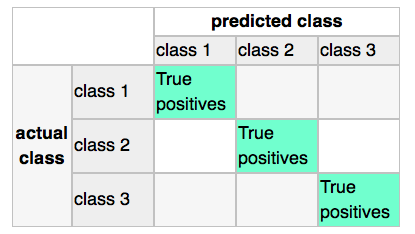


In [174]:
# Using Ridge and Multinomial
logitCV_multi=LogisticRegressionCV(cv=5, penalty='l2', multi_class='multinomial')
logitCV_multi.fit(x_train, y_train) 
print(logitCV_multi.score(x_test,y_test))

0.764285714286


In [175]:
a=logitCV_ovr.coef_
a.shape

(3, 41)

**Baseline model accuracy with the 32 indicators in the original ADNIMERGE_full data is aroung 75%.
Both OVR and MULTINOMIAL give similar accuracy.** Next we wil check if imputing the data improves the prediction. First impute wiht mean then with median.

In [176]:
#back to the original data set with missingness, make a copy, and then impute the mean
df_merged2 = df_merged.copy()
df_merged2= df_merged.fillna(df_merged.mean())
df_merged2.isnull().sum()

Unnamed: 0                    0
DX_bl                         0
PTGENDER_Male                 0
PTMARRY_Married               0
PTMARRY_Never married         0
PTMARRY_Widowed               0
PTETHCAT_Not Hisp/Latino      0
PTETHCAT_Unknown              0
PTRACCAT_Asian                0
PTRACCAT_Black                0
PTRACCAT_Hawaiian/Other PI    0
PTRACCAT_More than one        0
PTRACCAT_White                0
APOE4_1                       0
APOE4_2                       0
AGE                           0
PTEDUCAT                      0
ADAS11_bl                     0
ADAS13_bl                     0
MMSE_bl                       0
RAVLT_immediate_bl            0
RAVLT_learning_bl             0
RAVLT_forgetting_bl           0
RAVLT_perc_forgetting_bl      0
FAQ_bl                        0
Ventricles_bl                 0
Hippocampus_bl                0
WholeBrain_bl                 0
Entorhinal_bl                 0
Fusiform_bl                   0
MidTemp_bl                    0
ICV_bl  

In [177]:
itrain, itest = train_test_split(range(df_merged_full.shape[0]), train_size=0.50)
df_train=df_merged2.iloc[itrain]
df_test=df_merged2.iloc[itest]
x_features=['PTETHCAT_Not Hisp/Latino','PTETHCAT_Unknown','PTRACCAT_Asian', 'PTRACCAT_Black','PTRACCAT_Black',
            'PTRACCAT_Hawaiian/Other PI','PTRACCAT_More than one','PTRACCAT_White','APOE4_1','APOE4_2','AGE', 'PTEDUCAT','PTGENDER_Male','PTMARRY_Married','PTMARRY_Never married','PTMARRY_Widowed',
            'ADAS11_bl','ADAS13_bl','MMSE_bl','RAVLT_immediate_bl','RAVLT_learning_bl','RAVLT_forgetting_bl',
            'RAVLT_perc_forgetting_bl', 'FAQ_bl','Ventricles_bl','Hippocampus_bl', 'WholeBrain_bl','Entorhinal_bl',
            'Fusiform_bl','MidTemp_bl','ICV_bl','MOCA_bl', 'EcogPtMem_bl','EcogPtLang_bl','EcogPtVisspat_bl',
            'EcogPtPlan_bl','EcogPtOrgan_bl','EcogPtDivatt_bl','EcogSPTotal_bl','FDG_bl','AV45_bl']
x_train=df_train[x_features]
y_train=df_train[['DX_bl']]
x_test=df_test[x_features]
y_test=df_test[['DX_bl']]
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((140, 41), (140, 1), (140, 41), (140, 1))

In [178]:
# Using Ridge and OVR
logitCV_ovr=LogisticRegressionCV(cv=5, penalty='l2')
logitCV_ovr.fit(x_train, y_train) 
logitCV_multi=LogisticRegressionCV(cv=5, penalty='l2', multi_class='multinomial')
logitCV_multi.fit(x_train, y_train) 

print("OVR:",logitCV_ovr.score(x_test,y_test))
print("Multinomial:",logitCV_multi.score(x_test,y_test))

OVR: 0.757142857143
Multinomial: 0.807142857143


In [151]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,logitCV_ovr.predict(x_test)))

[[43 10  0]
 [18 52  4]
 [ 0  2 11]]


In [136]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,logitCV_multi.predict(x_test)))

[[42 13  0]
 [13 53  4]
 [ 0  2 13]]


In [187]:
#Imputing with the median
df_merged3 = df_merged.copy()
df_merged3= df_merged.fillna(df_merged.median())
itrain, itest = train_test_split(range(df_merged_full.shape[0]), train_size=0.50)
df_train=df_merged3.iloc[itrain]
df_test=df_merged3.iloc[itest]
x_features=['PTETHCAT_Not Hisp/Latino','PTETHCAT_Unknown','PTRACCAT_Asian', 'PTRACCAT_Black','PTRACCAT_Black',
            'PTRACCAT_Hawaiian/Other PI','PTRACCAT_More than one','PTRACCAT_White','APOE4_1','APOE4_2','AGE', 'PTEDUCAT','PTGENDER_Male','PTMARRY_Married','PTMARRY_Never married','PTMARRY_Widowed',
            'ADAS11_bl','ADAS13_bl','MMSE_bl','RAVLT_immediate_bl','RAVLT_learning_bl','RAVLT_forgetting_bl',
            'RAVLT_perc_forgetting_bl', 'FAQ_bl','Ventricles_bl','Hippocampus_bl', 'WholeBrain_bl','Entorhinal_bl',
            'Fusiform_bl','MidTemp_bl','ICV_bl','MOCA_bl', 'EcogPtMem_bl','EcogPtLang_bl','EcogPtVisspat_bl',
            'EcogPtPlan_bl','EcogPtOrgan_bl','EcogPtDivatt_bl','EcogSPTotal_bl','FDG_bl','AV45_bl']
x_train=df_train[x_features]
y_train=df_train[['DX_bl']]
x_test=df_test[x_features]
y_test=df_test[['DX_bl']]
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((140, 41), (140, 1), (140, 41), (140, 1))

In [188]:
logitCV_ovr=LogisticRegressionCV(cv=5, penalty='l2')
logitCV_ovr.fit(x_train, y_train) 
logitCV_multi=LogisticRegressionCV(cv=5, penalty='l2', multi_class='multinomial')
logitCV_multi.fit(x_train, y_train) 

print("OVR:",logitCV_ovr.score(x_test,y_test))
print("Multinomial:",logitCV_multi.score(x_test,y_test))

OVR: 0.757142857143
Multinomial: 0.764285714286


Imputing with the mean (highest accuracy of 80%) or median (highest accuracy of 76%) gave pretty similar results based on the randomness of the train-test split. But regardless it was similar to the dataset which had all dropped values which makes sense given the missing data was less than 10%.

# Using PCA + expanded dataset


In [307]:
from sklearn.decomposition import PCA

In [337]:
# Choosing only the ANDIMERGE_full variables
itrain, itest = train_test_split(range(df_merged_full.shape[0]), train_size=0.50)
df_train=df_merged2.iloc[itrain]
df_test=df_merged2.iloc[itest]
x_train=df_train.iloc[:, 1:42]
y_train=df_train[['DX_bl']]
x_test=df_test.iloc[:, 1:42]
y_test=df_test[['DX_bl']]

x_full=df_merged3.iloc[:, 1:42]
y_full=df_merged3.iloc[:,0:1]
x_full.shape, y_full.shape
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_full.shape

((140, 41), (140, 1), (140, 41), (140, 1), (372, 41))

In [338]:
y_train_np=y_train.values
y_train_np=y_train_np.reshape(-1,)

log_m = LogisticRegression()
scores=[]
for n in range(1,41): 
    pca = PCA(n_components=n)
    pca.fit(x_train)
    x_train_pca = pca.transform(x_train)
    s_mean=np.mean(cross_val_score(log_m, x_train_pca, y_train_np, cv=5))
    scores.append(s_mean)
scores
np.argmax(scores)

31

In [339]:
pca = PCA(n_components=31)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
log_pca_train=LogisticRegression(fit_intercept=True).fit(x_train_pca, y_train)
log_pca_test=LogisticRegression(fit_intercept=True).fit(x_test_pca, y_test)
print("Accuracy score train:", log_pca_train.score(x_train_pca, y_train))
print("Accuracy score test:", log_pca_test.score(x_test_pca, y_test))

Accuracy score train: 0.985714285714
Accuracy score test: 0.985714285714


In [361]:
# Choosing just the genetic factors
itrain, itest = train_test_split(range(df_merged_full.shape[0]), train_size=0.50)
df_train=df_merged2.iloc[itrain]
df_test=df_merged2.iloc[itest]
x_train=df_train.iloc[:,42:7464]
y_train=df_train[['DX_bl']]
x_test=df_test.iloc[:,42:7464]
y_test=df_test[['DX_bl']]

x_full=df_merged3.iloc[:,42:7464]
y_full=df_merged3.iloc[:,0:1]
x_full.shape, y_full.shape
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_full.shape

((140, 7421), (140, 1), (140, 7421), (140, 1), (372, 7421))

In [362]:
y_train_np=y_train.values
y_train_np=y_train_np.reshape(-1,)

In [363]:
from sklearn.model_selection import cross_val_score
log_m = LogisticRegression()
scores=[]
for n in range(1, 500): 
    pca = PCA(n_components=n)
    pca.fit(x_train)
    x_train_pca = pca.transform(x_train)
    s_mean=np.mean(cross_val_score(log_m, x_train_pca, y_train_np, cv=5))
    scores.append(s_mean)
scores
np.argmax(scores)

14

In [364]:
pca = PCA(n_components=14)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
log_pca_train=LogisticRegression(fit_intercept=True).fit(x_train_pca, y_train)
log_pca_test=LogisticRegression(fit_intercept=True).fit(x_test_pca, y_test)
print("Accuracy score train:", log_pca_train.score(x_train_pca, y_train))
print("Accuracy score test:", log_pca_test.score(x_test_pca, y_test))

Accuracy score train: 0.621428571429
Accuracy score test: 0.65


In [350]:
# Choosing ALL factors
itrain, itest = train_test_split(range(df_merged_full.shape[0]), train_size=0.50)
df_train=df_merged2.iloc[itrain]
df_test=df_merged2.iloc[itest]
x_train=df_train.iloc[:, 1:7464]
y_train=df_train[['DX_bl']]
x_test=df_test.iloc[:, 1:7464]
y_test=df_test[['DX_bl']]

x_full=df_merged3.iloc[:, 1:7464]
y_full=df_merged3.iloc[:,0:1]
x_full.shape, y_full.shape
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_full.shape

((140, 7462), (140, 1), (140, 7462), (140, 1), (372, 7462))

In [351]:
y_train_np=y_train.values
y_train_np=y_train_np.reshape(-1,)

log_m = LogisticRegression()
scores=[]
for n in range(1,500): 
    pca = PCA(n_components=n)
    pca.fit(x_train)
    x_train_pca = pca.transform(x_train)
    s_mean=np.mean(cross_val_score(log_m, x_train_pca, y_train_np, cv=5))
    scores.append(s_mean)
scores
np.argmax(scores)

44

In [352]:
pca = PCA(n_components=44)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
log_pca_train=LogisticRegression(fit_intercept=True).fit(x_train_pca, y_train)
log_pca_test=LogisticRegression(fit_intercept=True).fit(x_test_pca, y_test)
print("Accuracy score train:", log_pca_train.score(x_train_pca, y_train))
print("Accuracy score test:", log_pca_test.score(x_test_pca, y_test))

Accuracy score train: 0.792857142857
Accuracy score test: 0.828571428571


### PCA + LogisticRegression with 32 predictors
We first tried a model with the 32 predictors in the ADNIMERGE_Full dataset to see if linear combination of these predictors made for a better model. We got an accury of more than 98% which is our best model.

### PCA + Logistic Regression with only gene expression profile
Accuracy of around 65%

### PCA + Logistic Regression with ADNIMERGE + gene expression profile = full data set
Accuracy = 83%


# Appendix:

### Details of Data clean-up

#### ADNIMERGE_full: 
After analyzing the ADNIMERGE data, we found that there are few issues need to be solved: longitudinal factor and correlation. Here, we have chosen only baseline visit data because:
It is little relevance if we choose the baseline or last visit since we believe that the genetic expression does not change over few years which the study has taken place
We need some criteria to have a unique key of each observation. Problem is a single patient (PTID) has multiple visits, so either we combine multiple data points into a longitudinal factor or keep only one visit. 
We want to extend the dataset based on PTID with genetic expression data, which does not have have a longitudinal aspect 
Hence keeping only the baseline data can be justified and we chose to ignore the longitudinal aspect. Here we have looked at what age the AD happens and how it is distributed. The histograms illustrates that not all observations are AD, but the results are varying degrees. 

*Getting rid of administrative data:* There are many columns in the dataset which are only for administrative purposes (dates, months, field strength etc) and have no predictive power or provide any incremental value to our purpose. We dropped these manually. An unfortunate casualty is the PIB variable (the B-amyloid) which was collected only for ADNI1 thus is unavailable for ADNI2. 

*Getting rid of anachronistic data:* The next stage of drops are based on the fact that we are taking only baseline observations thus for any given predictor (eg. hippocampus) we need to drop the endline observation. The odd thing is they still remained in the dataset despite filtering by VISCODE=bl, but both values baseline and the pseudo 'endline' values are the same. Dropped these psuedo endline values and kept only 'bl' suffixed values.

*Getting rid of variables which don’t make predictive or scientific sense:*
- CDR is highly predictive of DX-bl thus dropped it as it is a test for Clinical Dementia, one of the advanced symptoms of Alzheimer's.
- EcogSP tests: these are everyday cognitive tests verified by the study partner who comes with the participant. This will not a strong predictor so dropped them.

After the clean up we were left with th **789 observation and 34 columns**.

### ADNI Gene Expression Profile:
This dataset contains the gene expression profile of 744 patients from ADNI2 and ADNI GO. The ADNI Gene_Expression_profile contains about 49386 probe sets with information on LocusLink and Symbols. The LocusLink contains the information on the gene symbols. In order to clean the data, we have taken following steps:

- Since we are working with only ADNI2, we filtered out ADNIGO observations.
- There are a number of empty cells for the LocusLink. Since LocusLink represents the specific genetic expression in each of the ProbeSet, we cannot impute the values on each of these empty LocusLinks. Therefore we decided to dropped the ProbeSet values for all observations (that applies to 744 patients) which has no LocusLink. In dropping these, we removed certain combined information in the Symbols, which we understand as some synthetic values after genetic expression data is collected. After dropping these empty cells, we got about 43785 LocusLinks to predict the dependent variable. 
- There were multiple LocusLinks. We dealt with the multiple Locuslinks by two ways. First we limited our ProbeSet to all values with “_at” rather than “_s_at” or “x_at” which we believed were equally valid ways to choose our LocusLinks from. By limiting to all ProbeSets with “_at” extension, we were able to reduce most duplicates in the LocusLink. By doing so, the number of predictors were reduced to 9332 predictors (genes). Second, after filtering, we took the unique values for the LocusLink since different ProbeSets had same LocusLink. The underlying reason was that since the LocusLink had the same name with different ProbeSet, the correlation with same genes were very high. By doing so, the number of predictors were reduced to 7421. 
After the clean up we were left with th **452 observations and 7421 genetic expressions.**

**The two datasets were merged by the unique key PTID to create an expanded dataset of 372 observations and 7455 columns.**
